In [1]:
import regex
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import emoji
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
worldcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis("off")
plt.show

#replace "text" with the text that you want to generate the word cloud for

In [3]:
#renaming file name to another format

import os

os.rename("SQL_Cheat_Sheet_JOIN_statements.csv", "SQL_Cheat_Sheet_JOIN_statements.docx")

In [4]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False
    
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author = None
    return date, time, author, message

In [6]:
data = []

conversation = 'WhatsApp Chat with IBADAN NORTH LG CORPS.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [7]:
df = pd.DataFrame(data, columns=["Date","Time","Author","Message"])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(5))
print(df.info())
print(df.Author.unique())

           Date      Time             Author  \
8410 2023-01-01   6:16 PM  +234 816 622 3108   
8411 2023-01-01  11:07 PM               None   
8412 2023-01-02  10:32 AM               None   
8413 2023-01-02  11:18 AM               None   
8414 2023-01-02  11:32 AM               None   

                                                Message  
8410                                    <Media omitted>  
8411  Your security code with +234 803 659 5989 chan...  
8412  Your security code with +234 902 329 1401 chan...  
8413  +234 806 813 7798: https://chat.whatsapp.com/K...  
8414  Your security code with +234 803 353 4747 chan...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8415 entries, 0 to 8414
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     8415 non-null   datetime64[ns]
 1   Time     8415 non-null   object        
 2   Author   7734 non-null   object        
 3   Message  8415 non-null   ob

In [8]:
total_messages = df.shape[0]
print(total_messages)

8415


In [9]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

1325


In [10]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list

df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

0


In [11]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between IBADAN NORTH LG CORPS")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between IBADAN NORTH LG CORPS
Total Messages:  8415
Number of Media Shared:  1325
Number of Emojis Shared 0
Number of Links Shared 224


In [17]:
media_message_df = df[df['Message'] == '<Media omitted>']
message_df = df.drop(media_message_df.index)
message_df['Letter_count'] = message_df['Message'].apply(lambda s : len(s))
message_df['Word_Count'] = message_df['Message'].apply(lambda s : len(s.split(' ')))
message_df["MessageCount"] = 1

l = ["Ogunkoya Jamiu .O", "ERUDI7E Joshua"]
for i in range(len(l)):
    req_df = message_df[message_df["Author"] == l[i]]
    print(f'Stats of {l[i]} -')
    
    print('Message Sent', req_df.shape[0])
    
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Average Words per message', words_per_message)
    
    media = media_message_df[media_message_df["Author"] == l[i]].shape[0]
    print('Media Message Sent', media)
    
    emojis = sum(req_df['emoji'].str.len())
    print('Emoji_Sent', emojis)
    
    links = sum(req_df["urlcount"])
    print('Links Sent', links)

Stats of Ogunkoya Jamiu .O -
Message Sent 69
Average Words per message 8.985507246376812
Media Message Sent 5
Emoji_Sent 0
Links Sent 0
Stats of ERUDI7E Joshua -
Message Sent 614
Average Words per message 6.3387622149837135
Media Message Sent 36
Emoji_Sent 0
Links Sent 0


In [18]:
total_emojis_list = list(set([a for b in message_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in message_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

There are 396669 words in all the messages.


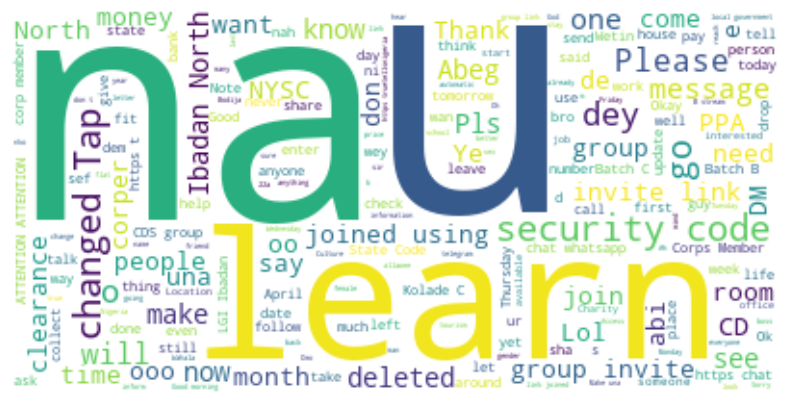

In [19]:
text = " ".join(review for review in message_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure( figsize=(15,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Author name Ogunkoya Jamiu .O


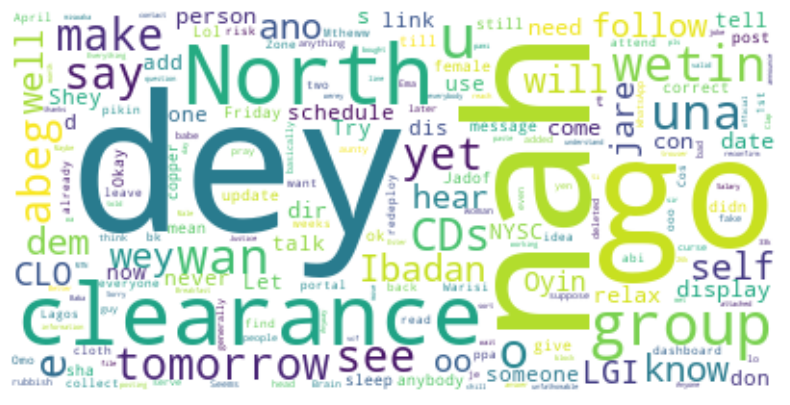

Author name ERUDI7E Joshua


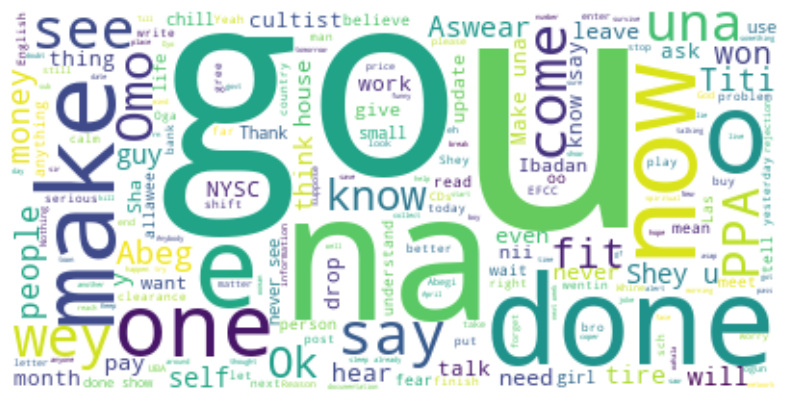

In [20]:
l = ["Ogunkoya Jamiu .O", "ERUDI7E Joshua"]
for i in range(len(l)):
  dummy_df = message_df[message_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()